# 【確認課題】scikit-learn

## 前準備




### データの読み取り

scikit-learnから提供される`iris`というデータセットを読み込みます。

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt


iris = load_iris()

# 説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

# 目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=["target"])


### 説明変数の把握

問. `df_data` の先頭 5 行を表示しましょう。


In [3]:
df_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


問. `df_data` の行数と列数を表示しましょう。

In [5]:
df_data.shape

(150, 4)

問. `df_data` の基本特徴量を表示しましょう。


In [6]:
df_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


問. `df_data` に欠損値がないかを確認しましょう。

In [10]:
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### 目的変数の把握

問. `df_target` のうち、ランダムに 10 行表示しましょう。


目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


### データの可視化（Extra）

問. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。
ただし、目的変数に応じて点の色と形を変更してください。


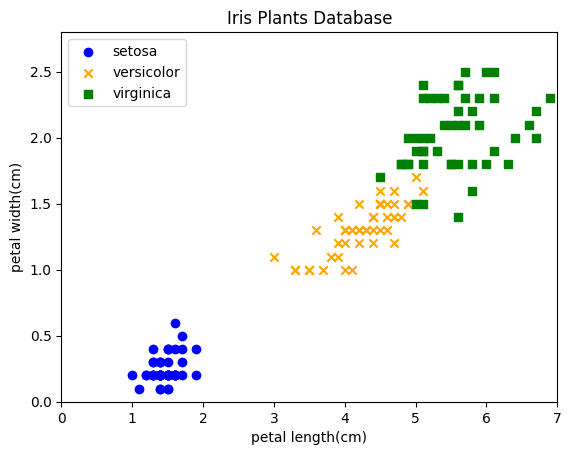

In [32]:
iris = load_iris()
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns=["target"])
df_data_concat = pd.concat([df_data, df_target], axis=1)
df_0 = df_data_concat[df_data_concat["target"] == 0]
df_1 = df_data_concat[df_data_concat["target"] == 1]
df_2 = df_data_concat[df_data_concat["target"] == 2]
plt.scatter(df_0["petal length (cm)"], df_0["petal width (cm)"], label="setosa", marker="o", color="b")
plt.scatter(df_1["petal length (cm)"], df_1["petal width (cm)"], label="versicolor", marker="x", color="orange")
plt.scatter(df_2["petal length (cm)"], df_2["petal width (cm)"], label="virginica", marker="s", color="g")
plt.title('Iris Plants Database')
plt.xlabel('petal length(cm)'), plt.ylabel('petal width(cm)')
plt.xlim(0, 7), plt.ylim(0.0,2.8) 
plt.legend()
plt.show()

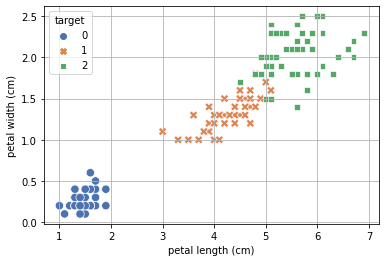

## 機械学習


### データの分割

問. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=0)

問. 本当に 4:1 に分割できているか確認しましょう。


In [40]:
total_samples = df_data.shape[0]
train_samples = x_train.shape[0]
test_samples =x_test.shape[0]
print(x_train, x_train.shape)
print(x_test, x_test.shape)
print(y_train, y_train.shape)
print(y_test, y_test.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
84                 5.4               3.0                4.5               1.5
27                 5.2               3.5                1.5               0.2
127                6.1               3.0                4.9               1.8
132                6.4               2.8                5.6               2.2
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[120 rows x 4 columns] (120, 4)
     sepal length (cm)  sepal w

### 学習

問. RandamForest の学習モデルのインスタンスを生成しましょう。


In [42]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100, random_state=0)

問. `x_train` と `y_train` を用いて、モデルを学習させましょう。


In [43]:
clf.fit(x_train, y_train)

C:\Users\kazuo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

### 推論


問. 学習したモデルに `x_test` を入力して予測をしましょう。

In [44]:
y_predict = clf.predict(x_test)

問. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。


In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。